<h2><center>ASSIGNMENT 1</center></h2>
<h2><center>NAME: DEEP ASHISH JARIWALA</center></h2>
<h2><center>SID: 20909290</center></h2>
<h2><center>Q: CM6</center></h2>

# IRIS DATASET

#### IMPORTING LIBRARIES

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score

#### IMPORTING DATASET AND ANALYZING THE DESCRIPTION OF DATASET

In [25]:
dataset = pd.read_csv("iris_dataset_missing.csv")
dataset['sepal_length'].fillna(5.858909, inplace = True)
dataset['sepal_width'].fillna(3.059083, inplace = True)
dataset['petal_length'].fillna(3.812370, inplace = True)
dataset['petal_width'].fillna(1.199708, inplace = True)
dataset = dataset[dataset['sepal_width'] >= 1.946010]
dataset.drop(dataset[dataset['sepal_width'] > 4.3].index, inplace = True)
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,103.000000,103.000000,103.000000,103.000000
mean,5.868614,3.056778,3.814610,1.210750
std,0.866055,0.415978,1.739788,0.789955
min,4.344007,2.115481,1.033031,-0.072203
25%,5.182506,2.783261,1.574653,0.324021
50%,5.743375,3.056142,4.092458,1.349398
75%,6.439874,3.237781,5.070242,1.827568
max,7.795561,4.249211,6.768611,2.603123


<p>All the missing values of the dataset, i.e., NaN values, are replaced by the particular feature's mean in the dataset. The final description of the dataset is shown in the box above. Moreover, all the outliers have been removes which were detected in previous questions</p> 

#### DATASET PREPARATION BEFORE TRAINING

In [26]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

X_train, X_sep, y_train, y_sep = train_test_split(X, y, test_size = 0.4, random_state = 275)
X_test, X_val, y_test, y_val = train_test_split(X_sep, y_sep, test_size = 0.5, random_state = 275)

<ul>
            <li>The features and target are separated and stored in the X and y dataframe, respectively. Then both the                         dataframe are converted to NumPy arrays before splitting the data.</li>
            <li>Using the sklearn train_test_split method twice, the numpy arrays are splitted into train,test and validation                   set(60%,20%,20%).</li>
            <li><i>X_train shape = (63,4)</i></li>
            <li><i>X_test and X_val shape = (21,4)</i></li>
            <li><i>y_train shape = (63,1)</i></li>
            <li><i>y_test and y_val shape = (21,1)</i></li>
</ul>

#### TRAINING KNN ON DEFAULT PARAMETERS

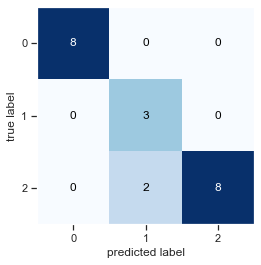

The accuracy score of KNN algorithm at default parameters: 90.47619047619048%


In [27]:
knn_validation = KNeighborsClassifier()
knn_validation.fit(X_train, y_train)

y_pred = knn_validation.predict(X_val)

cm = confusion_matrix(y_val, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
print(f"The accuracy score of KNN algorithm at default parameters: {accuracy_score(y_val, y_pred)*100}%")

<p>The model is trained based on the default parameters provided by the KNeighborsClassifier i.e. [k = 5, weights = uniform and p = 2 (euclidean_distance)] and it obtained an accuracy of 90.48% on validation set. Based on the results obtained and looking at the confusion matrix the algorithm is confused in classification of iris-versicolor and iris-virginica.</p>

#### CHECKING ACCURACY FOR DIFFERENT VALUES OF K

Text(0.5, 1.0, 'K-NN at different values of K')

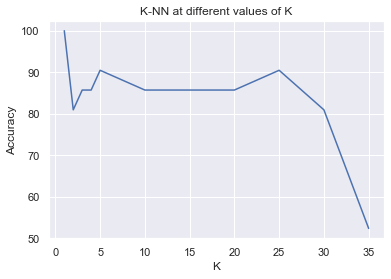

In [28]:
# Default training for KNN Model
k_val = [1,2,3,4,5,10,15,20,25,30,35]
accuracy = []

for k in k_val:
        knn1 = KNeighborsClassifier(n_neighbors=k)
        knn1.fit(X_train, y_train)
        y_pred = knn1.predict(X_val)
        scr = accuracy_score(y_val, y_pred)
        accuracy.append(scr*100)
# classification v/s accuracy curve to report the best value of K
plt.plot(k_val, accuracy)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("K-NN at different values of K")

<p>The above box shows the variation of k (nearest neighbors) to the model's accuracy on the validation set. The table below shows the comparison of accuracy at different values of k.</p>
<table>
  <tr>
    <th>K</th>
    <th>Accuracy</th>
  </tr>
  <tr>
    <td>1</td>
    <td>100%</td>
  </tr>
    <tr>
    <td>2</td>
    <td>80.95%</td>
  </tr>
    <tr>
    <td>3</td>
    <td>85.71%</td>
  </tr>
    <tr>
    <td>4</td>
    <td>85.71%</td>
  </tr>
    <tr>
    <td>5</td>
    <td>90.47%</td>
  </tr>
     <tr>
    <td>10</td>
    <td>85.71%</td>
  </tr>
     <tr>
    <td>15</td>
    <td>85.71%</td>
  </tr>
     <tr>
    <td>20</td>
    <td>85.71%</td>
  </tr>
     <tr>
    <td>25</td>
    <td>90.47%</td>
  </tr>
     <tr>
    <td>30</td>
    <td>80.95%</td>
  </tr>
  <tr>
    <td>35</td>
    <td>52.38%</td>
  </tr>
</table>
<p>Therefore, at k = 1 we have obtained the best accuracy of 100% but it could an overfit of the model on the training set, taking second best accuracy for classification. At k = 5 and k = 25, we have the second best accuracy of 90.47% as the optimum parameter for classification. Therefore, K = 5 is selected as an optimum parameter.



</p>

<h2><center>ASSIGNMENT 1</center></h2>
<h2><center>NAME: DEEP ASHISH JARIWALA</center></h2>
<h2><center>SID: 20909290</center></h2>
<h2><center>Q: CM7</center></h2>

#### TESTING ON TEST SET WITH DEFAULT PARAMETERS

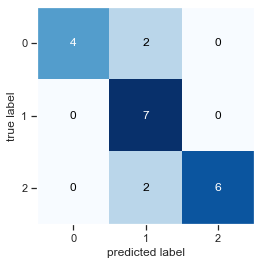

The accuracy score of KNN algorithm at default parameters on test set: 80.95238095238095%
The F score of KNN algorithm at default parameters on test set: 81.16402116402116%


In [29]:
knn_test = KNeighborsClassifier(n_neighbors=5)
knn_test.fit(X_train, y_train)

y_pred = knn_test.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
print(f"The accuracy score of KNN algorithm at default parameters on test set: {accuracy_score(y_test, y_pred)*100}%")
print(f"The F score of KNN algorithm at default parameters on test set: {f1_score(y_test, y_pred, average='macro')*100}%")

<p>Based on the current score, it seems that model can be improved by varying the default paramters of KNN (p, weights). Another scope of improvement can be made by using normaliztion techniques on the dataset. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.</p>

#### CHECKING ACCURACY FOR DIFFERENT DISTANCE METRICS PARAMETERS USING VALIDATION SET

Text(0.5, 1.0, 'K-NN at different distance metrics')

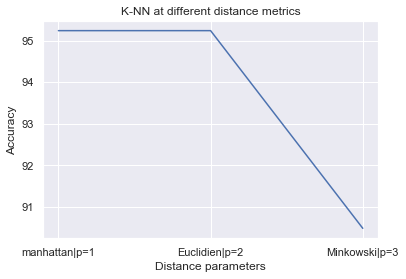

In [30]:
# testing on different distance metrics for the perfect model
# p = 1 manhattan, p = 2 eucliden, p = random minkowski
dist = ['manhattan|p=1', 'Euclidien|p=2', 'Minkowski|p=3']
accy = []
for i in range(1,4):
    knn_dist = KNeighborsClassifier(n_neighbors=5, weights='distance', p=i)
    knn_dist.fit(X_train, y_train)

    y_pred_dist = knn_dist.predict(X_val)
    score = accuracy_score(y_val, y_pred_dist)
    accy.append(score*100)

plt.plot(dist,accy)
plt.xlabel("Distance parameters")
plt.ylabel("Accuracy")
plt.title("K-NN at different distance metrics")

<p>The above box shows the variation of p (distance metric) to the model's accuracy on the validation set. The table below shows the comparison of accuracy at different values of p.</p>
<table>
  <tr>
    <th>Distance metric</th>
    <th>Accuracy</th>
  </tr>
  <tr>
    <td>p=1|Manhattan</td>
    <td>95.24%</td>
  </tr>
    <tr>
    <td>p=2|Euclidean</td>
    <td>95.24%</td>
  </tr>
     <tr>
    <td>p=random|Minkowski</td>
    <td>90.48%</td>
  </tr>
</table>
<p>The accuracy is same for first two measure therfore, the selected default value of p i.e. 2.</p>

#### SCALING THE DATASET USING STANDARD SCALER

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
X_val_scaled = sc.transform(X_val)

<p>Standard Scaler is used as a standardization technique, as it organizes the data in such a way that it is distributed normally (Gaussian with 0 mean and unit variance)</p>

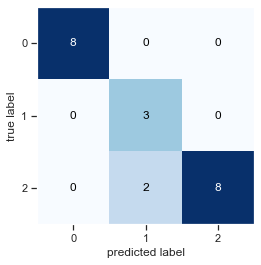

The accuracy score of KNN algorithm at the best parameters on validation set after nomarlization: 90.47619047619048%
The F score of KNN algorithm at the best parameters on test set after nomarlization: 87.96296296296296%


In [32]:
knn_normalized = KNeighborsClassifier(n_neighbors=5,  weights='distance', p=2)
knn_normalized.fit(X_train_scaled, y_train)

y_pred = knn_normalized.predict(X_val_scaled)

cm = confusion_matrix(y_val, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
print(f"The accuracy score of KNN algorithm at the best parameters on validation set after nomarlization: {accuracy_score(y_val, y_pred)*100}%")
print(f"The F score of KNN algorithm at the best parameters on test set after nomarlization: {f1_score(y_val, y_pred, average='macro')*100}%")

#### EFFECT OF BEST PARAMETERS AND NORMALIZATION OF DATA ON TEST SET

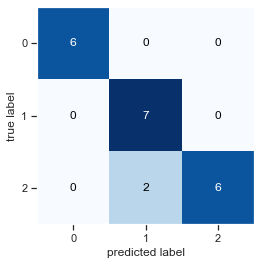

The accuracy score of KNN algorithm at the best parameters on test set after nomarlization: 90.47619047619048%
The F score of KNN algorithm at the best parameters on test set after nomarlization: 91.07142857142857%


In [33]:
knn_normalized = KNeighborsClassifier(n_neighbors=5,  weights='distance', p=2)
knn_normalized.fit(X_train_scaled, y_train)

y_pred = knn_normalized.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()
print(f"The accuracy score of KNN algorithm at the best parameters on test set after nomarlization: {accuracy_score(y_test, y_pred)*100}%")
print(f"The F score of KNN algorithm at the best parameters on test set after nomarlization: {f1_score(y_test, y_pred, average='macro')*100}%")

<p>To conclude, Many variations were used to train the model and check the accuracy on validation set. The table below shows various aspects that were tested along with the accuracy obtained</p>
<table>
  <tr>
    <th>Paramters used</th>
    <th>Accuracy</th>
     <th>F1_score</th>
  </tr>
  <tr>
    <td>Default parameters|test_set</td>
    <td>80.95%</td>
    <td>81.16</td>
  </tr>
    <tr>
    <td>k=5|p=2|Euclidean|weights = distance|validation set</td>
    <td>90.48%</td>
  </tr>
     <tr>
    <td>k=5|p=2|Euclidean|weights = distance|standardization|validation set</td>
    <td>90.48%</td>
    <td>87.96</td>
  </tr>
    <tr>
    <td>k=5|p=2|Euclidean|weights = distance|standardization|testset</td>
    <td>90.48%</td>
    <td>91.07</td>
  </tr>
</table>
<p>The last column shows the final result that has an accuracy of 90.48%. Normalization and selection of distance metric has improved the model by a large factor. The overall accuracy has been improved to 90.48% from 80.95% on test set using the variations as shown in the above table.</p>